# Basic Data Visualizations

In [2]:
#Import packages
import csv
import pandas
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Faciility Class Frequency

Text(0, 0.5, 'Reservation count (log)')

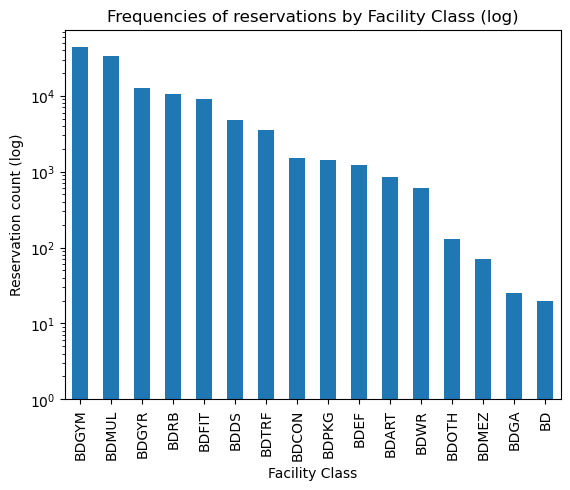

In [172]:
df = pandas.read_csv('/Users/patrickmoll/Desktop/cis590data/DateTimeCleanedData/DateTimeCleanedReservationsAll.csv')
df['Reservation Count'] = 1
fig, ax = plt.subplots()
ax.set_title("Frequencies of reservations by Facility Class (log)")
df['Facility Class'].value_counts().plot(ax=ax, kind='bar', log=True)
ax.set_xlabel('Facility Class')
ax.set_ylabel('Reservation count (log)')

## Facility Location Frequency

Text(0, 0.5, 'Reservation count')

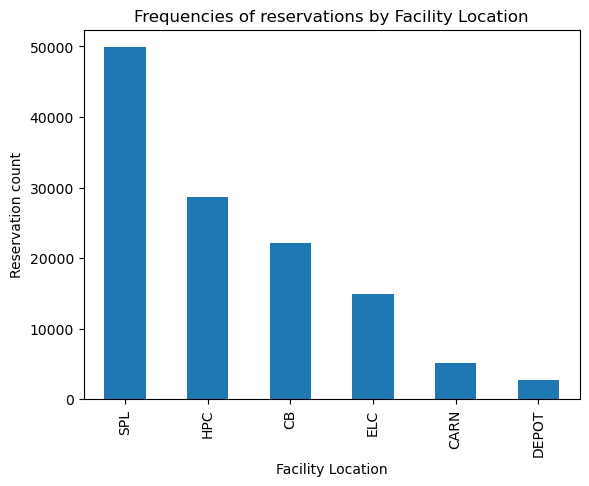

In [173]:
fig, ax = plt.subplots()
ax.set_title("Frequencies of reservations by Facility Location")
df['Facility Location'].value_counts().plot(ax=ax, kind='bar')
ax.set_xlabel('Facility Location')
ax.set_ylabel('Reservation count')

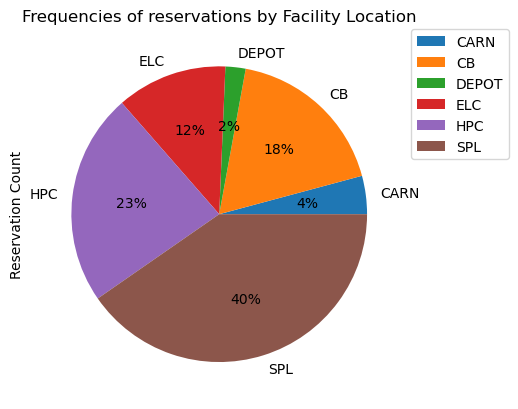

In [174]:
df.groupby(['Facility Location']).sum().plot(kind='pie', y = 'Reservation Count',autopct='%1.0f%%')
plt.title("Frequencies of reservations by Facility Location")
#place legend in center right of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

## Facility Code Frequency

Text(0, 0.5, 'Reservation count (log)')

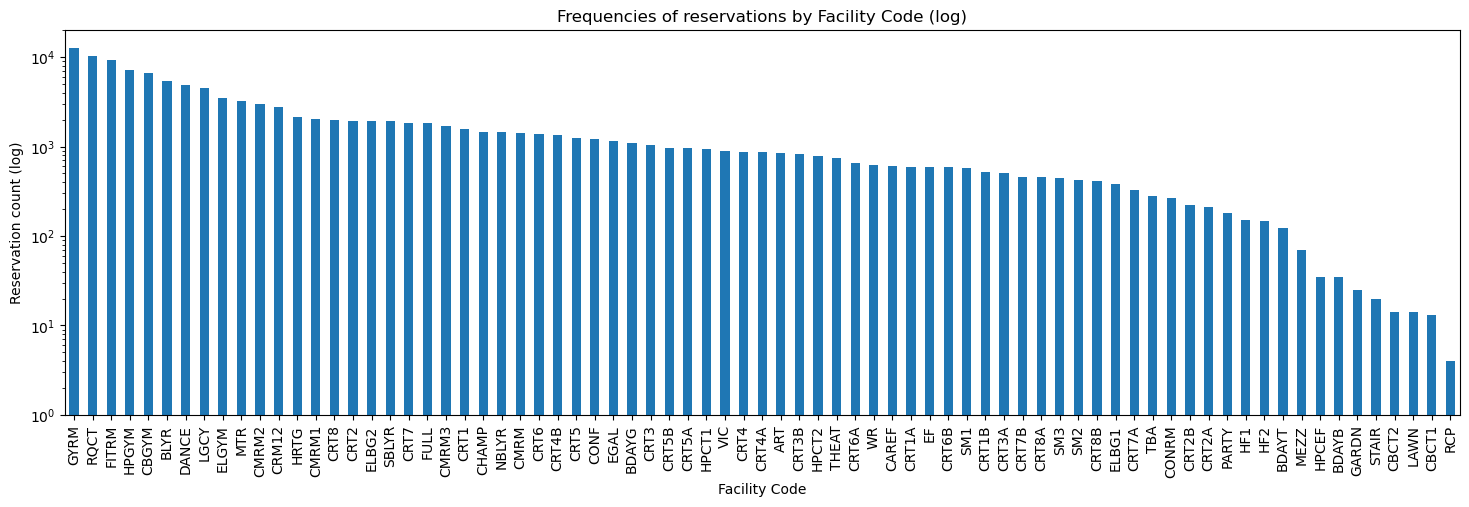

In [175]:
fig, ax = plt.subplots()
ax.set_title("Frequencies of reservations by Facility Code (log)")
df['Facility Code'].value_counts().plot(ax=ax, kind='bar', figsize=(18, 5), log=True)
ax.set_xlabel('Facility Code')
ax.set_ylabel('Reservation count (log)')

## Facility Frequency

Text(0, 0.5, 'Reservation count (log)')

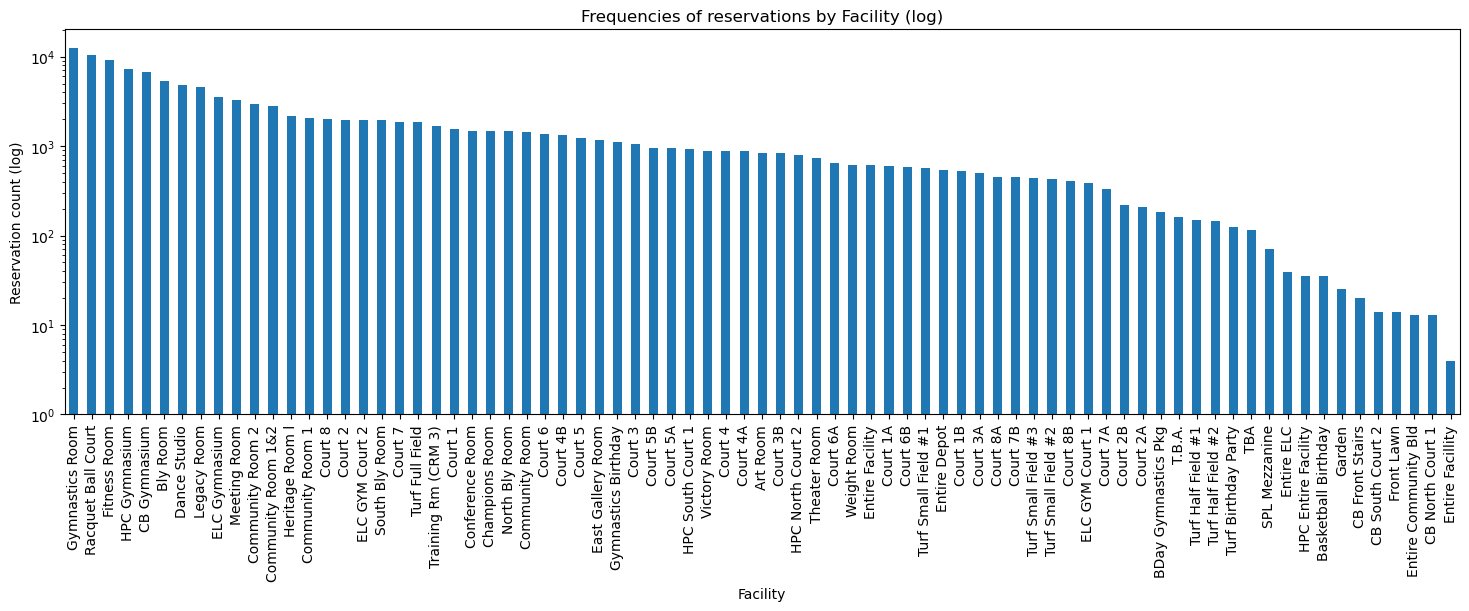

In [177]:
fig, ax = plt.subplots()
ax.set_title("Frequencies of reservations by Facility (log)")
df['Facility'].value_counts().plot(ax=ax, kind='bar', figsize=(18, 5), log=True)
ax.set_xlabel('Facility')
ax.set_ylabel('Reservation count (log)')

## Status Frequency

Text(0, 0.5, 'Reservation count (log)')

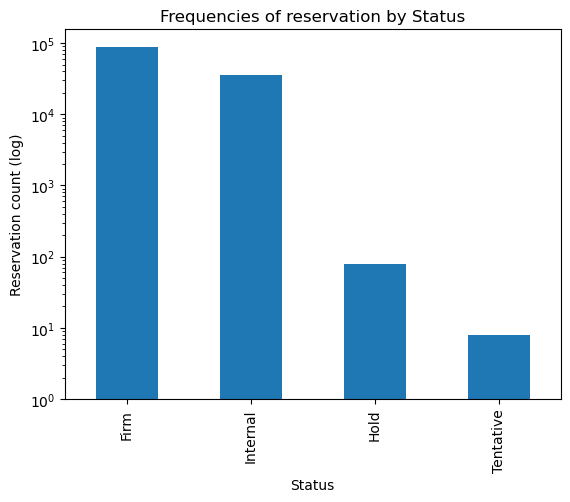

In [178]:
fig, ax = plt.subplots()
ax.set_title("Frequencies of reservation by Status")
df['Status'].value_counts().plot(ax=ax, kind='bar', log=True)
ax.set_xlabel('Status')
ax.set_ylabel('Reservation count (log)')

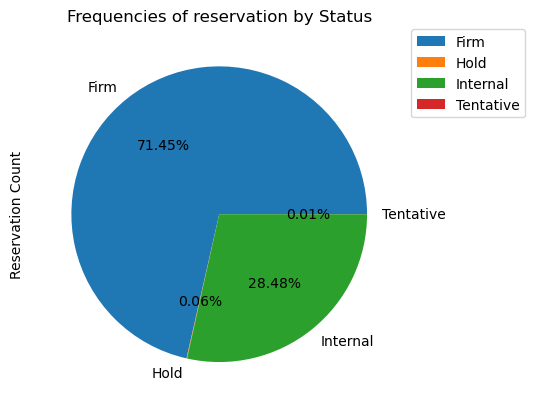

In [179]:
df.groupby(['Status']).sum().plot(kind='pie', y = 'Reservation Count',autopct='%1.2f%%')
plt.title("Frequencies of reservation by Status")
#place legend in center right of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

## Reservation Type Frequency

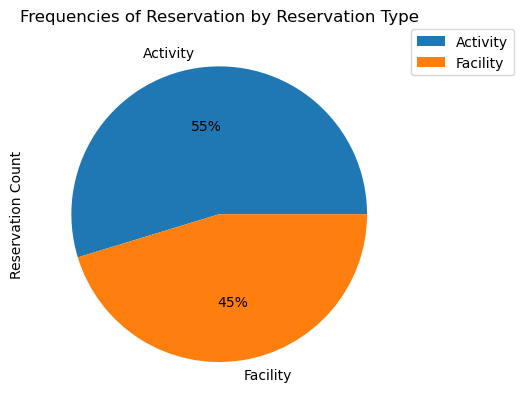

In [180]:
df.groupby(['Reservation Type']).sum().plot(kind='pie', y = 'Reservation Count',autopct='%1.0f%%')
plt.title("Frequencies of Reservation by Reservation Type")
#place legend in center right of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

## Headcount Visualization

Text(0, 0.5, 'frequency of headcount (log)')

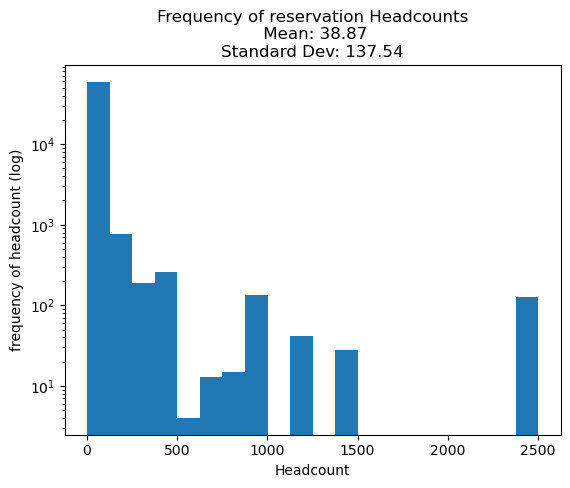

In [181]:
fig, ax = plt.subplots()
plt.hist(df['Headcount'],bins =20, log=True)
mean = df['Headcount'].mean()
std = df['Headcount'].std()
plt.title("Frequency of reservation Headcounts\n Mean: " + '{0:.2f}'.format(mean) +"\nStandard Dev: " + '{0:.2f}'.format(std))
ax.set_xlabel('Headcount')
ax.set_ylabel('frequency of headcount (log)')

## Reservation Duration Visualization

Text(0, 0.5, 'frequency of Duration (Minutes) (log)')

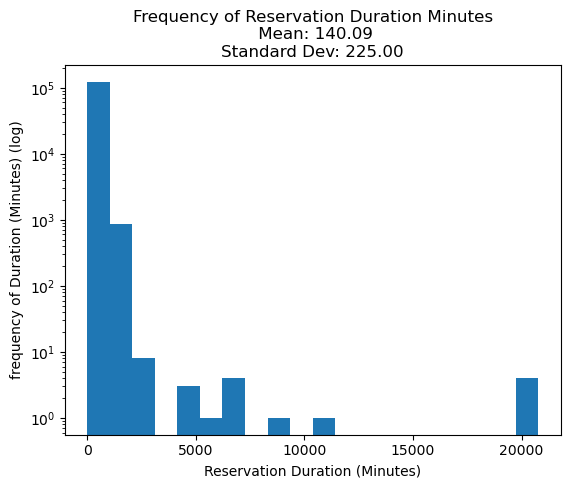

In [182]:
fig, ax = plt.subplots()
plt.hist(df['Duration Minutes'],bins =20, log=True)
mean = df['Duration Minutes'].mean()
std = df['Duration Minutes'].std()
plt.title("Frequency of Reservation Duration Minutes\n Mean: " + '{0:.2f}'.format(mean) +"\nStandard Dev: " + '{0:.2f}'.format(std))
ax.set_xlabel('Reservation Duration (Minutes)')
ax.set_ylabel('frequency of Duration (Minutes) (log)')

## Reservation Date Visualizations

### By day of the week

Text(0.5, 1.0, 'Frequencies of Reservation Day of Week')

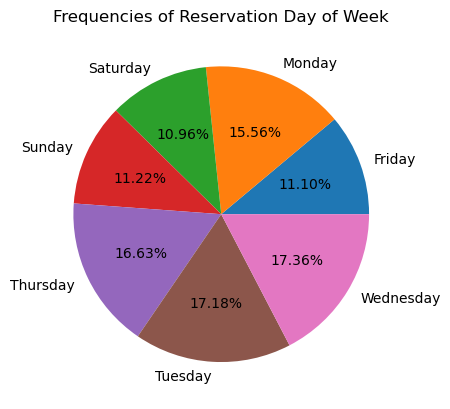

In [183]:
df['weekday'] = pandas.to_datetime(df['BeginTimeDate']).apply(lambda x: x.day_name())
df.groupby(['weekday']).sum().plot(kind='pie', y = 'Reservation Count',autopct='%1.2f%%', legend=None)
plt.ylabel('')
plt.title("Frequencies of Reservation Day of Week")

Text(0, 0.5, 'Total Reservations')

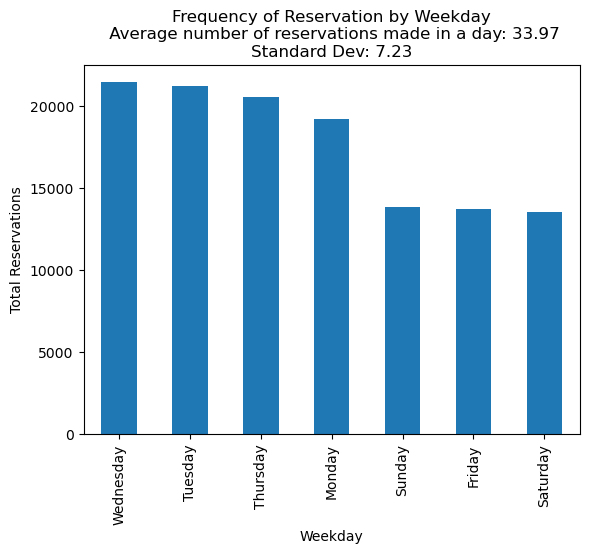

In [196]:
fig, ax = plt.subplots()
mean = df['weekday'].value_counts().mean()/(10*52)
std = df['weekday'].value_counts().std()/(10*52)
plt.title("Frequency of Reservation by Weekday\n Average number of reservations made in a day: " + '{0:.2f}'.format(mean) +"\nStandard Dev: " + '{0:.2f}'.format(std))

df['weekday'].value_counts().plot(ax=ax, kind='bar')
ax.set_xlabel('Weekday')
ax.set_ylabel('Total Reservations')

### By month of the year

Text(0.5, 1.0, 'Frequencies of Reservation by Month')

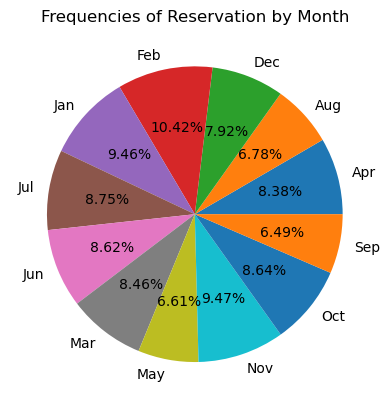

In [184]:
import calendar
df['Month'] = pandas.DatetimeIndex(df['BeginTimeDate']).month
df['MonthName'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

df.groupby(['MonthName']).sum().plot(kind='pie', y = 'Reservation Count',autopct='%1.2f%%', legend=None)
plt.ylabel('')
plt.title("Frequencies of Reservation by Month")

Text(0, 0.5, 'Total Reservations')

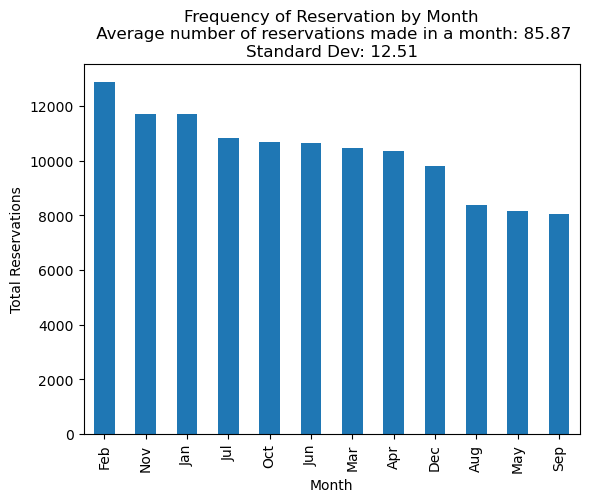

In [198]:
fig, ax = plt.subplots()
mean = df['Month'].value_counts().mean()/(10 * 12)
std = df['Month'].value_counts().std()/(10 * 12)
plt.title("Frequency of Reservation by Month\n Average number of reservations made in a month: " + '{0:.2f}'.format(mean) +"\nStandard Dev: " + '{0:.2f}'.format(std))

df['MonthName'].value_counts().plot(ax=ax, kind='bar')
ax.set_xlabel('Month')
ax.set_ylabel('Total Reservations')

## By year (2013 - 2022)

Text(0, 0.5, 'Total Reservations')

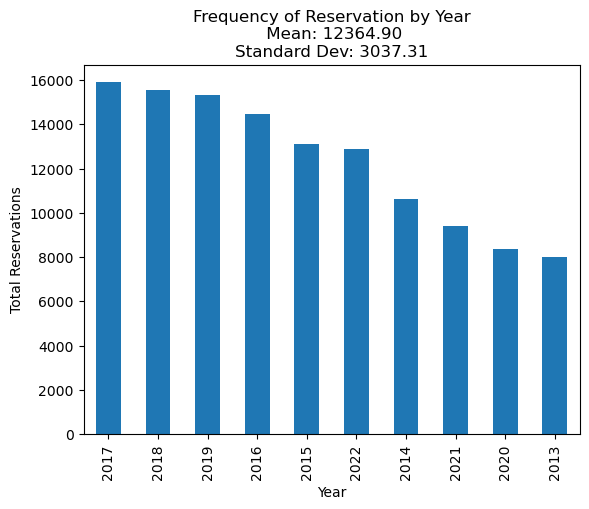

In [164]:
df['Year'] = pandas.DatetimeIndex(df['BeginTimeDate']).year
fig, ax = plt.subplots()
mean = df['Year'].value_counts().mean()
std = df['Year'].value_counts().std()
plt.title("Frequency of Reservation by Year\n Mean: " + '{0:.2f}'.format(mean) +"\nStandard Dev: " + '{0:.2f}'.format(std))
df['Year'].value_counts().plot(ax=ax, kind='bar')
ax.set_xlabel('Year')
ax.set_ylabel('Total Reservations')